## <center>CQF exam one</center>

### <div align="right"><i>done by Sergei Beshenov,<br> June 2023 cohort</br></i></div>

#### The list of libraries used for the task:

In [1]:
# Import pandas
import pandas as pd
pd.set_option('display.precision', 4)
# Import numpy
import numpy as np
from numpy.linalg import multi_dot
# Set numpy random seed
np.random.seed(19)
# Import cufflinks
import cufflinks as cf
cf.set_config_file(offline=True, dimensions=((1000,600)))
# Import plotly express
import plotly.express as px
px.defaults.width, px.defaults.height = 1000, 600
import os
# norm dist
from scipy.stats import norm
# more charts
import matplotlib.pyplot as plt

### Optimal Portfolio Allocation
An investment universe of the following risky assets with a dependence structure (correlation) applies to all questions below as relevant:


\begin{matrix}
 Asset&\mu&\sigma&w\\
 A&0.05&0.07&w_{1}\\
 B&0.07&0.28&w_{2}\\
 C&0.15&0.25&w_{3}\\
 C&0.22&0.31&w_{4}
 \end{matrix} 

\begin{equation*}
corr= \begin{pmatrix}
1&0.4&0.3&0.3\\
0.4&1&0.27&0.42\\
0.3&0.27&1&0.5\\
0.3&0.42&0.5&1
\end{pmatrix}
\end{equation*}

**Question 1.** Global Minimum Variance portfolio is obtained subject to the budget constraint:

$$\underset{\omega}{argmin}\frac{1}{2}\omega\acute{}\;\Sigma\omega\;\;\;\;s.t.\omega\acute{}\textbf{1}=1$$

* Derive the analytical solution for optimal allocations $\omega\acute{}$. Provide full mathematical workings
* In the derivation, include the formula derivation for the Lagrangian multiplier.
* Compute optimal allocations (Global MV portfolio) for the given investment universe.


The problem can be worked out through Lagrangian form given by:

$$L(\omega,\lambda_{1})=\frac{1}{2}\omega\acute{}\;\Sigma\omega+\lambda_{1}(\omega\acute{}\textbf{1}-1)$$
<br></br>
<center> where $\textbf{1}$ is a vector of ones.</center>

The first order conditions are as follows:

$$ \frac{\partial L}{\partial \omega} = \Sigma\omega+\lambda_{1}\textbf{1}=0$$

$$\frac{\partial L}{\partial \lambda_{1}} = \omega\acute{}\textbf{1}-1=0 $$

From first equation we get: 
$$\Sigma\omega=-\lambda_{1}\textbf{1}$$

$$\Sigma^{-1}\Sigma\omega=-\Sigma^{-1}\lambda_{1}\textbf{1}$$

$$\omega=-\lambda_{1}\Sigma^{-1}\textbf{1}$$

Plug it into: $\textbf{1}\acute{}\omega=1 $ (from FOC) to get the following:


$$-\lambda_{1}\textbf{1}\acute{}\Sigma^{-1}\textbf{1}=1 $$

So then $$\lambda_{1}=-\frac{1}{\textbf{1}\acute{}\Sigma^{-1}\textbf{1}}$$

And $$\omega^{*}=\frac{\Sigma^{-1}\textbf{1}}{\textbf{1}\acute{}\Sigma^{-1}\textbf{1}}$$

Since we were given the correlation matrix, let's calculate the covariance matrix $\Sigma$ by multiplying correlations with associated standard deviations

In [2]:
corr_mat = np.array([[1,0.4,0.3,0.3],[0.4,1,0.27,0.42],[0.3,0.27,1,0.5],[0.3,0.42,0.5,1]])
stdev_mat = np.array([[0.07,0,0,0],[0,0.28,0,0],[0,0,0.25,0],[0,0,0,0.31]]) # diag matrix with std dev
cov_mat = np.matmul(stdev_mat,np.matmul(corr_mat,stdev_mat))

In [3]:
print("Covariance matrix is as follows:", cov_mat, sep=os.linesep)

Covariance matrix is as follows:
[[0.0049   0.00784  0.00525  0.00651 ]
 [0.00784  0.0784   0.0189   0.036456]
 [0.00525  0.0189   0.0625   0.03875 ]
 [0.00651  0.036456 0.03875  0.0961  ]]


##### Now we can calculate an inverted covariance matrix:

In [4]:
inv_cov_mat = np.linalg.inv(cov_mat)
print('Inverted Covariance matrix:',inv_cov_mat,sep=os.linesep)

Inverted Covariance matrix:
[[256.33078818 -20.50521083 -12.51725725  -4.53831162]
 [-20.50521083  17.21811596  -0.39445138  -4.98365996]
 [-12.51725725  -0.39445138  22.06964258  -7.90146915]
 [ -4.53831162  -4.98365996  -7.90146915  15.78991307]]


###### Finally, we obtain the vector of weights for Global Minimum Variance portfolio and corresponding vol: 

In [5]:
# vector of ones
ones = np.array(np.ones(4))
# use the derived formula
weights = np.matmul(inv_cov_mat,ones)/(np.matmul(ones.transpose(),np.matmul(inv_cov_mat,ones)))

print('Weights by asset: \n A.',format(weights[0], ".2%"),
                        '\n B.',format(weights[1], ".2%"),
                        '\n C.',format(weights[2], ".2%"),
                        '\n D.',format(weights[3], ".2%"))
print('Vol of GMV portflolio: ', format(np.sqrt(np.matmul(weights.transpose(),np.matmul(cov_mat,weights))),".2%"))

Weights by asset: 
 A. 104.31% 
 B. -4.13% 
 C. 0.60% 
 D. -0.78%
Vol of GMV portflolio:  6.91%


<b>Question 2.</b> Consider the optimization for a target return m. There is no risk-free asset.

$$\underset{\omega}{argmin}\frac{1}{2}\omega\acute{}\;\Sigma\omega\;\;\;\;s.t. \left(\mathbf{\omega}^{\prime} \boldsymbol{\mu}=m\right. and \left.\mathbf{\omega}^{\prime} \mathbf{1}=1\right)$$

* Compute $\omega^{*}$ and portfolio risk $\sigma_{Π}=\sqrt[]{\omega\acute{}\;\Sigma\omega}$ for m = 7% for three levels of correlation.
* Correlation matrix ×1, ×1.3, ×1.8, subject to individual correlation upper limit of 0.99, if the
scaling results in correlation value above 1. Provide all results in a single table.

$$
L\left(\omega, \lambda_1, \lambda_2\right)=\frac{1}{2}\mathbf{\omega}^{\prime} \Sigma \mathbf{\omega}+\lambda_1\left(\mathbf{\omega}^{\prime} \mu-\mu_{p, 0}\right)+\lambda_2\left(\mathbf{\omega}^{\prime} \mathbf{1}-1\right)$$

\begin{aligned}
& \frac{\partial L\left(\mathbf{\omega}, \lambda_1, \lambda_2\right)}{\partial \mathbf{\omega}}=\Sigma \mathbf{\omega}+\lambda_1 \mu+\lambda_2 \mathbf{1}=0 \\
& \frac{\partial L\left(\mathbf{\omega}, \lambda_1, \lambda_2\right)}{\partial \lambda_1}=\mathbf{\omega}^{\prime} \mu-m=0 \\
& \frac{\partial L\left(\mathbf{\omega}, \lambda_1, \lambda_2\right)}{\partial \lambda_2}=\mathbf{\omega}^{\prime} \mathbf{1}-1=0
\end{aligned}


From the first FOC we have:
$$
\mathbf{\omega}=- \lambda_1 \Sigma^{-1} \mu- \lambda_2 \Sigma^{-1} \mathbf{1}
$$

Define the $N \times 2$ matrix $\mathbf{M}=[\mu \vdots \mathbf{1}]$ and the $2 \times 1$ vector $\lambda=\left(\lambda_1, \lambda_2\right)^{\prime}$. Then we can rewrite $\omega$ in matrix form as:

$$
\mathbf{\omega}=- \Sigma^{-1} \mathbf{M} \lambda
$$

Further, to find the values for $\lambda_1$ and $\lambda_2$, use second and third equations from FOC:
$$
\mu_0=\mu^{\prime} \mathbf{\omega}=- \lambda_1 \mu^{\prime} \Sigma^{-1} \mu- \lambda_2 \mu^{\prime} \Sigma^{-1} \mathbf{1}
$$

$$
1=1^{\prime} \mathbf{\omega}=- \lambda_1 1^{\prime} \Sigma^{-1} \mu- \lambda_2 1^{\prime} \Sigma^{-1} 1
$$

Now, we have two linear equations and involving $\lambda_1$ and $\lambda_2$ which we can write in matrix notation as:
$$
-\left(\begin{array}{cc}
\mu^{\prime} \Sigma^{-1} \mu & \mu^{\prime} \Sigma^{-1} \mathbf{1} \\
\mu^{\prime} \Sigma^{-1} \mathbf{1} & \mathbf{1}^{\prime} \Sigma^{-1} \mathbf{1}
\end{array}\right)\left(\begin{array}{c}
\lambda_1 \\
\lambda_2
\end{array}\right)=\left(\begin{array}{c}
\mu_0 \\
1
\end{array}\right) .
$$

Now, define:
$$
\begin{aligned}
\left(\begin{array}{cc}
\mu^{\prime} \Sigma^{-1} \mu & \mu^{\prime} \Sigma^{-1} \mathbf{1} \\
\mu^{\prime} \Sigma^{-1} \mathbf{1} & \mathbf{1}^{\prime} \Sigma^{-1} \mathbf{1}
\end{array}\right) & =\mathbf{M}^{\prime} \Sigma^{-1} \mathbf{M}=\mathbf{B} \\
\tilde{\mu}_0 & =\left(\begin{array}{c}
\mu_0 \\
1
\end{array}\right)
\end{aligned}
$$
so we can rewrite as,
$$
-\mathbf{B} \lambda=\tilde{\mu}_0 .
$$
Provided $\mathbf{B}$ is invertible, the solution for $\lambda=\left(\lambda_1, \lambda_2\right)^{\prime}$ is
$$
\lambda=-\mathbf{B}^{-1} \tilde{\mu}_0 .
$$
Substituting back into $\omega$ equation gives an explicit expression for the efficient portfolio weight vector $\mathbf{\omega}$ :
$$
\mathbf{\omega^{*}}=-\Sigma^{-1} \mathbf{M} \lambda= \Sigma^{-1} \mathbf{M}\left(\mathbf{B}^{-1} \tilde{\mu}_0\right)=\Sigma^{-1} \mathbf{M} \mathbf{B}^{-1} \tilde{\mu}_0
$$

In [6]:
def opt_weights(corr_coef,stdev_mat,corr_mat):
    corr_mat = corr_coef*corr_mat
    for i in range(corr_mat.shape[0]):
        corr_mat[i,i]=1
        
    cov_mat = np.matmul(stdev_mat,np.matmul(corr_mat,stdev_mat))
    inv_cov_mat = np.linalg.inv(cov_mat)
    m = 0.07
    m_1 = np.array([[m,1]]).transpose()
    M = np.array([[0.05,0.07,0.15,0.22],np.ones(4)]).transpose()
    B = np.matmul(M.transpose(), np.matmul(inv_cov_mat, M))
    B_inv = np.linalg.inv(B)
    w_opt = np.matmul(inv_cov_mat,np.matmul(M, np.matmul(B_inv, m_1)))
    vol_opt = np.sqrt(np.matmul(w_opt.transpose(), np.matmul(cov_mat, w_opt)))
    return np.concatenate((w_opt, vol_opt), axis = 0).tolist()

In [7]:
w_array = np.concatenate((np.array([['w_A','w_B','w_C','w_D','Port. vol']]).transpose(), opt_weights(1.0,stdev_mat,corr_mat),
                opt_weights(1.3,stdev_mat,corr_mat), opt_weights(1.8,stdev_mat,corr_mat)), axis = 1).tolist()
table = pd.DataFrame(w_array, columns = ['', 'corr x1', 'corr x1.3', 'corr x1.8'])
table['corr x1'] = table['corr x1'].astype(float).map('{:.2%}'.format)
table['corr x1.3'] = table['corr x1.3'].astype(float).map('{:.2%}'.format)
table['corr x1.8'] = table['corr x1.8'].astype(float).map('{:.2%}'.format)
table

,,corr x1,corr x1.3,corr x1.8
0,w_A,92.41%,99.65%,145.09%
1,w_B,-7.29%,-13.51%,-40.77%
2,w_C,5.47%,1.24%,-50.71%
3,w_D,9.40%,12.62%,46.39%
4,Port. vol,7.74%,7.65%,4.12%


### Understanding risk
<b>Question 3.</b> “Evaluating the P&L more frequently make it appear more risky than it actually is.” Make
the following simple computations to demonstrate this statement.

* Write down the formula for Sharpe Ratio and identify main parameter scaled with time.
* Compute Daily, Monthly, and Quarterly Sharpe Ratio, for Annualised SR of 0.53. No other inputs.
* Convert each Sharpe Ratio into Loss Probability (daily, monthly, quarterly, annual), using

$$Pr(\text{P&L}\lt 0)=Pr(x<-SR)$$.
where x is a standard Normal random variable.

$$SR_{annual}=\frac{(r_{annual}-r_{f,annual})\cdot t}{\sigma_{annual}\cdot\sqrt{t}}=0.53\;\;\;\;  \text{where t is time in years}\\
SR_{quarterly}=\frac{(r_{annual}-r_{f,annual})\frac{1}{4}}{\sigma_{annual}\frac{1}{\sqrt{4}}}=SR_{annual}\frac{1}{\sqrt{4}}=0.256\\
SR_{monthly}=SR_{annual}\frac{1}{\sqrt{12}}=0.153\\
SR_{daily}=SR_{annual}\frac{1}{\sqrt{252}}=0.033$$

In [8]:
print("Sharpe ratio, quarterly:",round(0.53/np.sqrt(4),3))
print("Sharpe ratio, monthly:",round(0.53/np.sqrt(12),3))
print("Sharpe ratio, daily:",round(0.53/np.sqrt(252),3))

Sharpe ratio, quarterly: 0.265
Sharpe ratio, monthly: 0.153
Sharpe ratio, daily: 0.033


In [9]:
print("Loss prob., annually:",round(norm.cdf(-0.53/np.sqrt(1)),3))
print("Loss prob., quarterly:",round(norm.cdf(-0.53/np.sqrt(4)),3))
print("Loss prob., monthly:",round(norm.cdf(-0.53/np.sqrt(12)),3))
print("Loss prob., daily:",round(norm.cdf(-0.53/np.sqrt(252)),3))

Loss prob., annually: 0.298
Loss prob., quarterly: 0.396
Loss prob., monthly: 0.439
Loss prob., daily: 0.487


Hence, we may conclude the following:
* <b>Sharpe ratio scales by squared root of time. The shorter the evaluation period, the lower the Sharpe ratio. So,  the quote “Evaluating the P&L more frequently make it appear more risky than it actually is” is valid.</b>
* <b>Loss probability is higher on shorter time periods and decreasing for longer periods which is consistent with the first statement.</b>

<b>Question 4.</b> Instead of computing the optimal allocations analytically, let’s conduct an experiment.
Generate above 700 random allocation sets: 4×1 vectors. Those will not be optimal and can be negative.

* Standardise each set to satisfy $\mathbf{\omega}^{\prime} \mathbf{1}=1$. In fact, generate 3 allocations and compute the 4th.
* For each set, compute $\mu_{Π} = \mathbf{\omega}^{\prime} \boldsymbol{\mu}$ and $\sigma_{Π}=\sqrt[]{\omega\acute{}\;\Sigma\omega}$.
* Plot the cloud of points,  $\mu_{Π}$ vertically on $\sigma_{Π}$ horizontally. Explain this plot.

Hint: use the investment universe settings above, but the task is not optimisation, and no other formulae
involved. Compute only what is asked in the question.

In [10]:
numofportfolio = 700
numofasset = 3 # 4th is to be computed as 1-sum of weights of 3 assets
mu = [0.05,0.07,0.15,0.22]


def portfolio_simulation(mu, cov_mat):
    # Initialize the lists
    rets = []; vols = []; wts = []
    # Simulate 5,000 portfolios
    for i in range (numofportfolio):
    # Generate random weights
        weights = np.random.random(numofasset)
        # Set weights such that sum of weights equals 1
        weights = np.concatenate((weights,(1- sum(weights))), axis = None)
        # Portfolio statistics
        rets.append(weights.T @ np.array(mu))
        vols.append(np.sqrt(multi_dot([weights.T, cov_mat, weights])))
        wts.append(weights)
    # Create a dataframe for analysis
    data = {'port_rets': rets, 'port_vols': vols}
    for counter, symbol in enumerate(["A","B","C","D"]) :
        data[symbol+' weight'] = [w[counter] for w in wts]
    portdf = pd.DataFrame(data)
    portdf['sharpe_ratio'] = portdf['port_rets'] / portdf['port_vols']
    return round(portdf,4)


In [11]:
# Create a dataframe for analysis
temp = portfolio_simulation(mu, cov_mat)

temp.head()
# Get the max sharpe portfolio stats
temp.iloc[temp.sharpe_ratio.idxmax()]

port_rets       0.0998
port_vols       0.1122
A weight        0.6461
B weight        0.0020
C weight        0.1443
D weight        0.2076
sharpe_ratio    0.8888
Name: 621, dtype: float64

In [12]:
 # Verify the above result 0.8747
temp.describe().T

,count,mean,std,min,25%,50%,75%,max
port_rets,700.0,0.0273,0.0672,-0.1595,-0.0186,0.0262,0.0727,0.2070
port_vols,700.0,0.2285,0.0700,0.0743,0.1816,0.2207,0.2680,0.4992
A weight,700.0,0.4882,0.2837,0.0007,0.2544,0.4767,0.7256,0.9975
B weight,700.0,0.5001,0.2861,0.0019,0.2366,0.5142,0.7408,0.9995
C weight,700.0,0.4951,0.2876,0.0016,0.2500,0.4880,0.7431,0.9981
D weight,700.0,-0.4834,0.4954,-1.9277,-0.8376,-0.4972,-0.1275,0.8544
sharpe_ratio,700.0,0.1858,0.3154,-0.3251,-0.0730,0.1232,0.4259,0.8888


##### Let's visualise the simulated portfilios

In [13]:
# Plot simulated portfolio
fig = px.scatter(
    temp, x='port_vols', y='port_rets', color='sharpe_ratio',
    labels={'port_vols': 'Expected Volatility', 'port_rets': 'Expected Return','sharpe_ratio': 'Sharpe Ratio'},
    title="Monte Carlo Simulated Portfolio"
    ).update_traces(mode='markers', marker=dict(symbol='cross'))

# Plot max sharpe
fig.add_scatter(
    mode='markers',
    x=[temp.iloc[temp.sharpe_ratio.idxmax()]['port_vols']],
    y=[temp.iloc[temp.sharpe_ratio.idxmax()]['port_rets']],
    marker=dict(color='RoyalBlue', size=20, symbol='star'),
    name = 'Max Sharpe'
).update(layout_showlegend=False)


# Show spikes
fig.update_xaxes(showspikes=True)
fig.update_yaxes(showspikes=True)
fig.show()


<b>Plot explanation:</b> Here we can see 700 portfolio distributed on the chart. Among those, there are many that yield negative return (the bottom of the chart, blue-ish colors). It's due to the fact, that we allow short positions in our portfolio.
Efficient portfolio have yellow-ish colors and have the best Sharpe ratio scores (around 0.8), while the most efficient has SR of 0.8888 and marked as the start on the chart. Given that we only simulate 700 portfolios, you barely can find the true GMV and optimal portfolios here.

<b>Question 5.</b> NASDAQ100 data provided (2012-2023) for you to implement the backtesting of 99%/10day
Value at Risk and report the following:

(a) The count and percentage of VaR breaches.

(b) The count of consecutive VaR breaches. (1, 1, 1 indicates two consecutive occurrences)

(c) Provide a plot which: identifies the breaches visually (crosses or other marks) and properly labels
axis X with at least years.

(d) In your own words, describe the sequence of breaches caused by COVID pandemic news in 2020-Feb versus 2020-Mar.

$$
\mathrm{VaR}_{10 D, t}=\text { Factor } \times \sigma_t \times \sqrt{10}
$$

- Compute the rolling standard deviation $\sigma_t$ from 21 daily returns.

- Timescale of that $\sigma_t$ remains 'daily' regardless of how many returns are in the sample. To make projection, use the additivity of variance $\sigma_{10 D}=\sqrt{\sigma_t^2 \times 10}$.

- A breach occurs when the forward realised 10-day return is below the $\mathrm{VaR}_t$ quantity.

$$
r_{10 D, t+10}<\mathrm{VaR}_{10 D, t} \quad \text { means breach, given both numbers are negative. }
$$

$\mathrm{VaR}$ is fixed at time $t$ and compared to the return realised from $t$ to $t+10$, computed $\ln \left(S_{t+10} / S_t\right)$. Alternatively, you can compare to $\ln \left(S_{t+11} / S_{t+1}\right)$ but state this assumption in your report upfront.

<b>Assumption1:  We calculate 10d returns this way $\ln \left(S_{t+11} / S_{t+1}\right)$</b>
    
<b>Assumption2: Nasdaq data provided starts from Dec, 2017 but not 2013 as written in the task.</b>

In [14]:
# retrieve the data
df = pd.read_csv('C:/Users/svbes/Downloads/nasdaq100.csv', parse_dates=True)
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
# prepare log returns daily, 21-days st.dev/ vol, VaR 99% 10 days, and forward 10 days return to compare it with VaR 
df['log_ret'] = np.log(df['Closing Price']) - np.log(df['Closing Price'].shift(1))
df['log_ret 10d forward'] = np.log(df['Closing Price']).shift(-11) - np.log(df['Closing Price'].shift(-1))
df['vol 21d'] = df['log_ret'].rolling(21).std()
df['VaR 99%, 10d'] = df['vol 21d']*norm.ppf(0.01)*np.sqrt(10)

In [16]:
# calculate breaches and consecutive breaches
df['breach'] = np.where(df['VaR 99%, 10d'] > df['log_ret 10d forward'], 1, 0)
df['consecutive_breach'] = np.where((df['breach'].shift(1) == 1) & (df['breach'] == 1), 1, 0)
df['num_of_cons_breaches'] = 0

In [17]:
# num of consecutive breaches (sum)
c = 0
cc = 0
for i in df.loc[df['breach'] == 1,].index:
    if i-1 == c:
        cc = cc+1
        c = i 
    else:
        df.loc[c,'num_of_cons_breaches'] = cc
        c = i
        cc = 0

In [18]:
num_breach = sum(df.loc[df['breach']==1,'breach'])
num_comparison = df.loc[~(df['log_ret 10d forward'].isna() | df['VaR 99%, 10d'].isna())].shape[0]

print('Total number of breaches: ', num_breach)
print('The percentage of breaches: ', format(num_breach/num_comparison,".2%"))
print('The expected percentage of breaches is 1%. So the model may need revision.')


Total number of breaches:  41
The percentage of breaches:  3.04%
The expected percentage of breaches is 1%. So the model may need revision.


<b>In the table below you will find all VaR breaches that occurred on the given timeline. You also may find there the consecutive breaches and number of consecutive breaches (in the table, the number of cons. breaches is cumulative of consecutive breaches and stated in the line of the last cons. breach in a sequence). </b>

In [19]:
df[df['breach'] == 1]   

,Date,Closing Price,log_ret,log_ret 10d forward,vol 21d,"VaR 99%, 10d",breach,consecutive_breach,num_of_cons_breaches
32,2018-01-19,6834.3301,3.3637e-03,-0.0613,0.0062,-0.0458,1,0,0
34,2018-01-23,6963.4600,8.2454e-03,-0.0500,0.0062,-0.0460,1,0,0
35,2018-01-24,6919.3501,-6.3546e-03,-0.0924,0.0066,-0.0483,1,1,0
36,2018-01-25,6916.2998,-4.4093e-04,-0.0909,0.0065,-0.0482,1,1,0
37,2018-01-26,7022.9702,1.5305e-02,-0.0688,0.0068,-0.0498,1,1,0
38,2018-01-29,6988.3198,-4.9461e-03,-0.0559,0.0070,-0.0516,1,1,4
68,2018-03-13,7046.5098,-1.1936e-02,-0.0860,0.0108,-0.0797,1,0,0
70,2018-03-15,7030.9702,-1.4227e-03,-0.0939,0.0105,-0.0775,1,0,0
204,2018-09-25,7563.1899,1.9111e-03,-0.0710,0.0075,-0.0553,1,0,0
205,2018-09-26,7563.0898,-1.3235e-05,-0.0913,0.0072,-0.0530,1,1,0


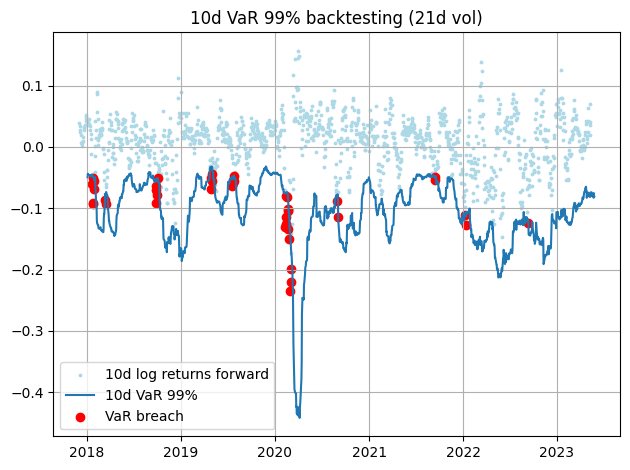

In [20]:
plt.scatter(df['Date'], df['log_ret 10d forward'], label='10d log returns forward', color = 'lightblue', s = 3)
plt.plot(df['Date'], df['VaR 99%, 10d'], label='10d VaR 99%')
plt.scatter(df.loc[df['breach'] == 1,'Date'], df[df['breach'] == 1]['log_ret 10d forward'], color='red', label='VaR breach')
plt.legend()
plt.title('10d VaR 99% backtesting (21d vol)')
plt.grid(True)
plt.tight_layout()
plt.show()
    

Starting from 11.02.20 we had 7 consecutive breaches, as the market got worried about the Covid19 and potential consequences for the world if the virus spreads. Global stock markets, including the Nasdaq, experienced a significant plunge.

Provided that VaR is calculated for 10 days horizon and then is being compared to 10 days returns, breaches become consecutive as these returns are smoothened and may include not only negative but positive changes too.
    
However, as February transitioned into March, the situation rapidly deteriorated. The number of COVID-19 cases surged globally, leading to widespread lockdowns, travel restrictions, and increased uncertainty surrounding the duration and severity of the pandemic.

In March 2020, stock markets experienced an unprecedented sell-off and extreme volatility (please see the tablea with worst returns/10 days from the date returns below). This was driven by a combination of factors, including the rapid spread of the virus, the declaration of a global pandemic by the World Health Organization (WHO), and the implementation of strict containment measures.

<b>By that time VaR estimates were adjusted based on volatility in February, so in March we were better prepared and got less breaches.


In [21]:
df.nsmallest(n=5,columns=['log_ret'])

,Date,Closing Price,log_ret,log_ret 10d forward,vol 21d,"VaR 99%, 10d",breach,consecutive_breach,num_of_cons_breaches
573,2020-03-16,7020.3799,-0.1300,0.0444,0.0512,-0.3763,0,0,0
571,2020-03-12,7263.6499,-0.0973,-0.0522,0.0371,-0.2728,0,0,0
568,2020-03-09,7948.0298,-0.0707,-0.1029,0.0279,-0.2051,0,0,0
1202,2022-09-13,12033.6201,-0.0570,-0.0542,0.0194,-0.1426,0,0,0
693,2020-09-03,11771.3701,-0.0537,-0.0568,0.0167,-0.1230,0,0,0


In [22]:
df.nsmallest(n=5,columns=['log_ret 10d forward'])

,Date,Closing Price,log_ret,log_ret 10d forward,vol 21d,"VaR 99%, 10d",breach,consecutive_breach,num_of_cons_breaches
562,2020-02-28,8461.8301,0.0030,-0.2348,0.0181,-0.1330,1,0,0
564,2020-03-03,8594.4902,-0.0325,-0.2209,0.0221,-0.1627,1,0,0
566,2020-03-05,8671.6602,-0.0315,-0.1985,0.0240,-0.1766,1,0,0
565,2020-03-04,8949.2803,0.0405,-0.1738,0.0237,-0.1747,0,0,0
560,2020-02-26,8873.7598,0.0044,-0.1497,0.0149,-0.1100,1,0,0


<b>Question 6.</b> Re-implement backtesting using the method above, recompute $\mathrm{VaR}_{10 D, t}$ but, with the input of EWMA $\sigma_{t+1}^2$. Use the variance for the entire dataset to initialise the scheme.

$$
\sigma_{t+1 \mid t}^2=\lambda \sigma_{t \mid t-1}^2+(1-\lambda) r_t^2
$$

with $\lambda=0.72$ value set to minimise out of sample forecasting error.

Hint: computation of EWMA $\sigma_{t+1}^2$ is not sufficient, proceed to compute $\mathrm{VaR}_{10 D, t}$ and count breaches in VaR.

(a-c) Provide the same deliverables (a), (b) and (c) as in the previous Question.

(d) Briefly (3-4 lines) discuss the impact of $\lambda$ on smoothness of EWMA-predicted volatility.

In [23]:
# initial vol
Vol_0 = df['log_ret'].std()
print('St dev of all returns: ', format(Vol_0, ".3%"))

St dev of all returns:  1.641%


In [24]:
# apply the initial vol for EWMA calculation
df2 = df.iloc[:,0:4]
df2.loc[1,'Vol_EWMA'] = Vol_0

In [25]:
# function for EWMA vols and related outputs calculation
# to check how lambda may affect the results
def EWMA(lambda_, df2):
    for i in range(1,df2.shape[0]-1):
        df2.loc[i+1,'Vol_EWMA'] = np.sqrt(lambda_*df2.loc[i,'Vol_EWMA']**2+(1-lambda_)*df2.loc[i,'log_ret']**2)

    df2['VaR 99%, 10d'] = df2['Vol_EWMA']*norm.ppf(0.01)*np.sqrt(10)
    # calculate breaches and consecutive breaches
    df2['breach'] = np.where(df2['VaR 99%, 10d'] > df2['log_ret 10d forward'], 1, 0)
    df2['consecutive_breach'] = np.where((df2['breach'].shift(1) == 1) & (df2['breach'] == 1), 1, 0)
    df2['num_of_cons_breaches'] = 0
    # num of consecutive breaches (sum)
    c = 0
    cc = 0
    for i in df.loc[df2['breach'] == 1,].index:
        if i-1 == c:
            cc = cc+1
            c = i 
        else:
            df2.loc[c,'num_of_cons_breaches'] = cc
            c = i
            cc = 0
    num_breach = sum(df2.loc[df2['breach']==1,'breach'])
    num_comparison = df2.loc[~(df2['log_ret 10d forward'].isna() | df2['VaR 99%, 10d'].isna())].shape[0]

    print('Total number of breaches (EWMA): ', num_breach)
    print('The percentage of breaches (EWMA): ', format(num_breach/num_comparison,".2%"))
    print('The expected percentage of breaches is 1%. The model may need revision.')
    return df2                                      

In [26]:
df2 = EWMA(0.72,df2)

Total number of breaches (EWMA):  54
The percentage of breaches (EWMA):  3.95%
The expected percentage of breaches is 1%. The model may need revision.


In the table below you will find all VaR breaches that occurred on the given timeline. You also may find there the consecutive breaches and number of consecutive breaches (in the table, the number of cons. breaches is cumulative of consecutive breaches and stated in the line of the last cons. breach in a sequence).

In [27]:
df[df['breach'] == 1]

,Date,Closing Price,log_ret,log_ret 10d forward,vol 21d,"VaR 99%, 10d",breach,consecutive_breach,num_of_cons_breaches
32,2018-01-19,6834.3301,3.3637e-03,-0.0613,0.0062,-0.0458,1,0,0
34,2018-01-23,6963.4600,8.2454e-03,-0.0500,0.0062,-0.0460,1,0,0
35,2018-01-24,6919.3501,-6.3546e-03,-0.0924,0.0066,-0.0483,1,1,0
36,2018-01-25,6916.2998,-4.4093e-04,-0.0909,0.0065,-0.0482,1,1,0
37,2018-01-26,7022.9702,1.5305e-02,-0.0688,0.0068,-0.0498,1,1,0
38,2018-01-29,6988.3198,-4.9461e-03,-0.0559,0.0070,-0.0516,1,1,4
68,2018-03-13,7046.5098,-1.1936e-02,-0.0860,0.0108,-0.0797,1,0,0
70,2018-03-15,7030.9702,-1.4227e-03,-0.0939,0.0105,-0.0775,1,0,0
204,2018-09-25,7563.1899,1.9111e-03,-0.0710,0.0075,-0.0553,1,0,0
205,2018-09-26,7563.0898,-1.3235e-05,-0.0913,0.0072,-0.0530,1,1,0


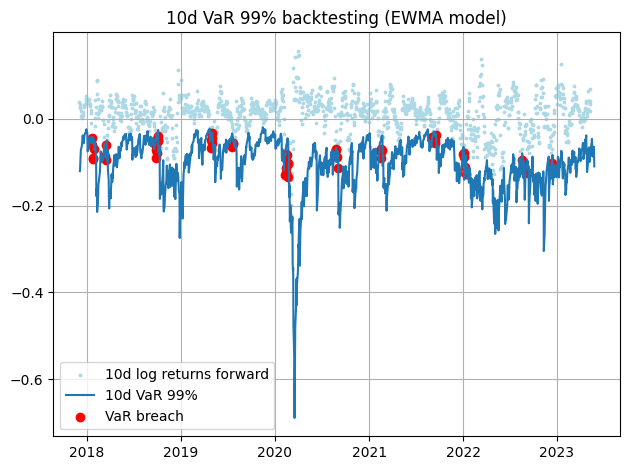

In [28]:
plt.scatter(df2['Date'], df2['log_ret 10d forward'], label='10d log returns forward', color = 'lightblue', s = 3)
plt.plot(df2['Date'], df2['VaR 99%, 10d'], label='10d VaR 99%')
plt.scatter(df2.loc[df2['breach'] == 1,'Date'], df2[df2['breach'] == 1]['log_ret 10d forward'], color='red', label='VaR breach')
plt.legend()
plt.title('10d VaR 99% backtesting (EWMA model)')
plt.grid(True)
plt.tight_layout()
plt.show()
    

<b> In the Exponentially Weighted Moving Average (EWMA) volatility model, lambda (λ) acts as a parameter that influences the importance assigned to previous observations in the volatility estimation process. 
    
<b>When lambda is set to a higher value, recent observations receive greater emphasis, resulting in a faster decay for older observations. Consequently, the volatility estimate becomes more responsive and adapts quickly to changes in the data. Conversely, a lower lambda value places more weight on older observations, leading to a smoother and slower-reacting volatility estimate.
    

The selection of an appropriate lambda value depends on the specific application and the characteristics of the data being analyzed. Often, lambda is chosen through techniques like optimization or trial and error to strike a balance between responsiveness and smoothness.
    
Let's see how results will be affected by using new lambdas in the following examples:


In [29]:
df2 = EWMA(0.25,df2)

Total number of breaches (EWMA):  89
The percentage of breaches (EWMA):  6.51%
The expected percentage of breaches is 1%. The model may need revision.


In [30]:
df2 = EWMA(0.99,df2)

Total number of breaches (EWMA):  24
The percentage of breaches (EWMA):  1.75%
The expected percentage of breaches is 1%. The model may need revision.


<b> Lambda of 0.25 yields way worse model in terms of the breach numbers, while lambda 0.99 makes difference and yields 1.75% breaches.